In [1]:
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

__let's use the IRIS dataset for the experimentation__

In [2]:
iris = load_iris()
X,y = iris.data, iris.target

__Let's load the data into a dataframe to visualize it__

In [3]:
import pandas as pd
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df["label_"] = y

def stringify(y):
    if y == 0:
        return "setosa"
    elif y == 1:
        return "versicolor"
    else:
        return "virginica"
        
df["label"] = df.label_.apply(lambda x: stringify(x))
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label_   label  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

__we are going to use only the petal length and width to model the classifier__

In [4]:
X = df[[df.columns[0], df.columns[2]]]
print("We are using:", X.columns)

We are using: Index(['sepal length (cm)', 'petal length (cm)'], dtype='object')


__split the data into train and test partitions__

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, shuffle=True)

__let's build a KNN model with neighbors=5 and estimate the misclassification error__

In [6]:
knn_model_sk = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn_model_sk.fit(X_train, y_train)
y_preds = knn_model_sk.predict(X_test)
print("Misclassification:",np.sum(y_preds != y_test),"out of", len(y_test))

Misclassification: 2 out of 30


__let's look at the max and min values of the selected features__

In [7]:
X.describe()

sepal length (cm)  petal length (cm)
count         150.000000         150.000000
mean            5.843333           3.758000
std             0.828066           1.765298
min             4.300000           1.000000
25%             5.100000           1.600000
50%             5.800000           4.350000
75%             6.400000           5.100000
max             7.900000           6.900000

__using the min/max values, we shall create a grid of points for visualizing the decision boundary__

In [8]:
x1 = X[X.columns[0]]
x2 = X[X.columns[1]]
grid_x1 = np.linspace(x1.min(), x1.max(), 100)
grid_x2 = np.linspace(x2.min(), x2.max(), 100)
x1v, x2v = np.meshgrid(grid_x1, grid_x2)

__create a dataframe of the synthetic mesh data and estimate the prediction ouputs__

In [9]:
test_data = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X.columns)
test_yhat = knn_model_sk.predict(test_data)

__let's plot the labeled meshgrid to visualize the shape of the decision boundary__

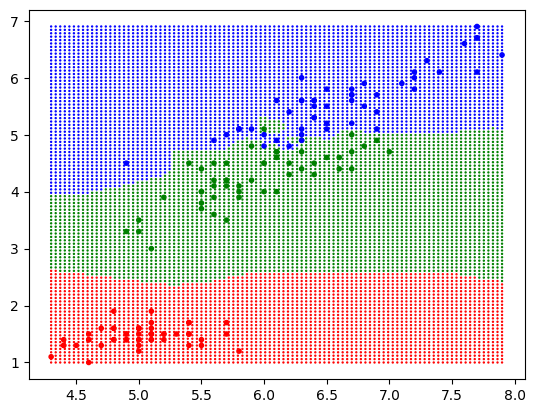

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.scatter(x1v, x2v, marker='.', s=2, c=test_yhat, cmap=colors.ListedColormap(['red','green','blue']))
plt.scatter(x1, x2, marker='.', c=y, cmap=colors.ListedColormap(['red','green','blue']))
plt.show()

__create modular functions to visualize the decision boundary__

In [11]:
def visualize_decision_boundary(X, y, model, title=""):
    # create the x1 and x2 axis as a linear space spawning from the minimum to maximum feature values.
    x1 = X[X.columns[0]]
    x2 = X[X.columns[1]]
    grid_x1 = np.linspace(x1.min(), x1.max(), 100)
    grid_x2 = np.linspace(x2.min(), x2.max(), 100)
    x1v, x2v = np.meshgrid(grid_x1, grid_x2)
    # create the test dataframe
    test_data = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X.columns)
    test_yhat = model.predict(test_data)
    # plot the data
    color_map = colors.ListedColormap(['red','green','blue'])
    plt.scatter(x1v, x2v, marker='.', s=2, c=test_yhat, cmap=color_map)
    plt.scatter(x1, x2, marker='.', c=y, cmap=color_map)
    if title != "":
        plt.title(title)
    return plt

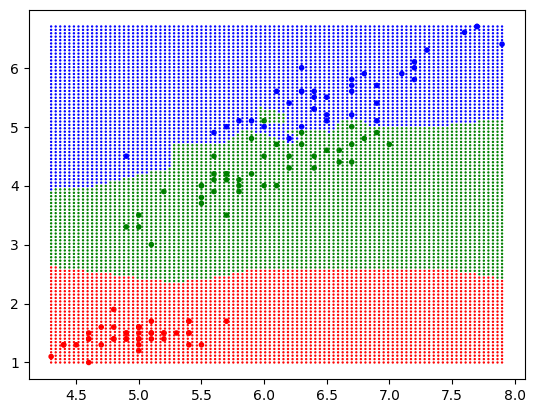

In [12]:
model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
model.fit(X_train, y_train)
visualize_decision_boundary(X_train, y_train, model).show()

__let's see how the decision boundary changes for different 'k' values__

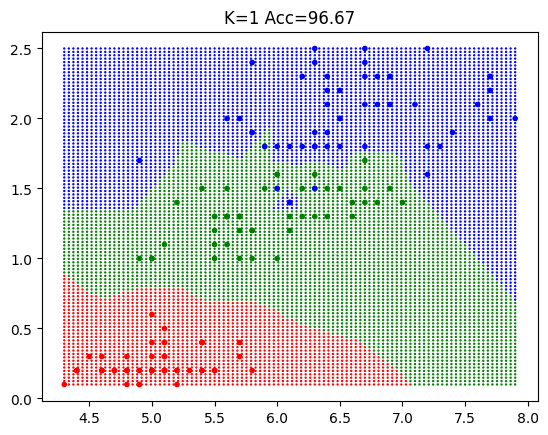

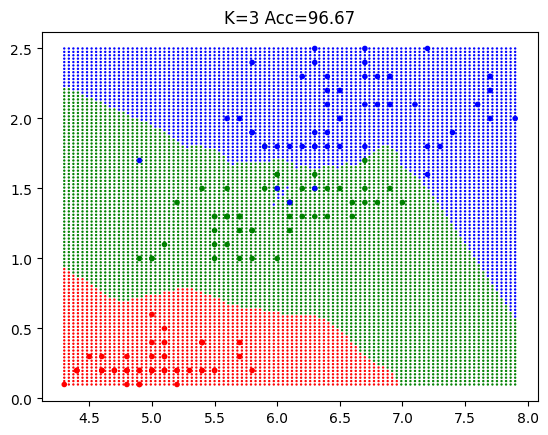

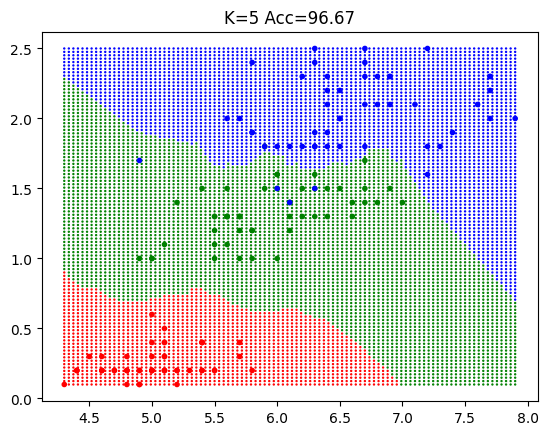

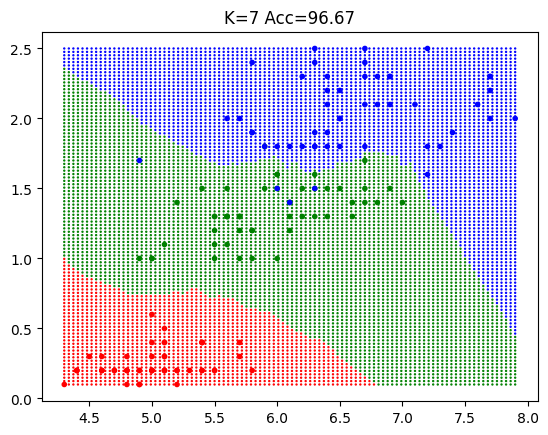

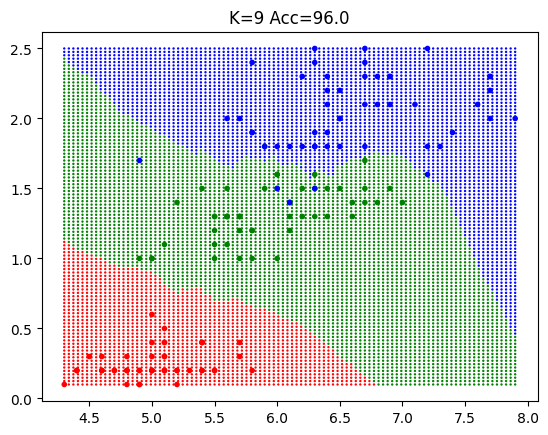

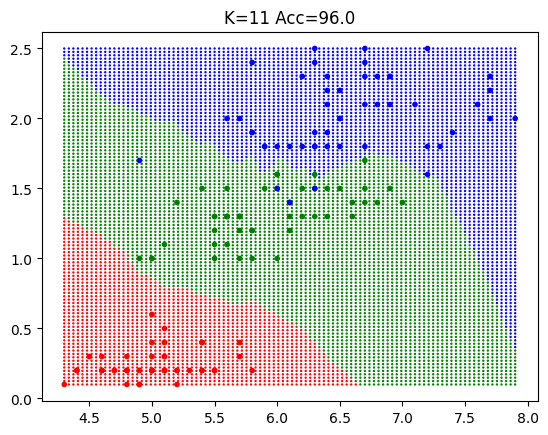

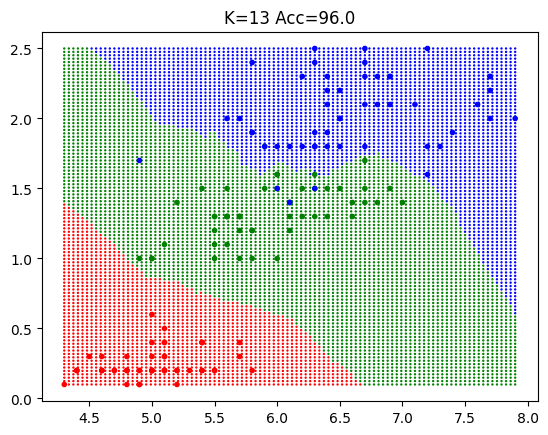

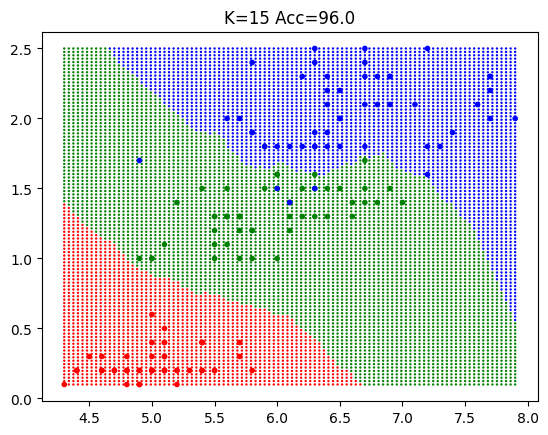

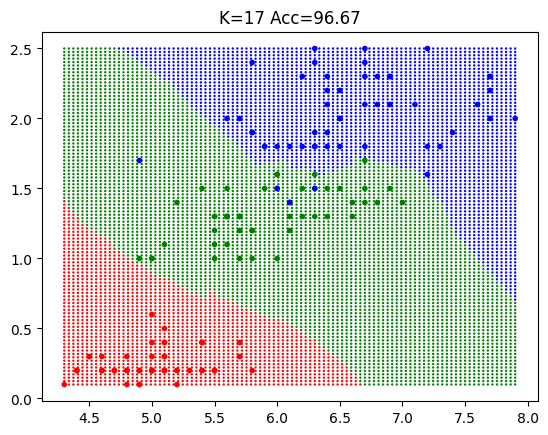

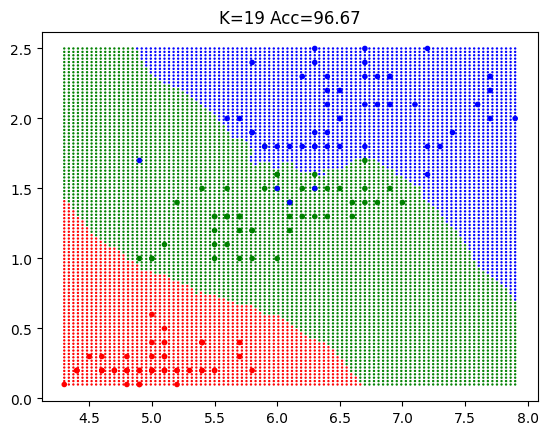

In [13]:
# change the features to get different decision boundaries.
X = df[[df.columns[0], df.columns[3]]]

for n in range(1,21,2):
    model = KNeighborsClassifier(n_neighbors=n, algorithm='kd_tree')
    model.fit(X, y)
    yhat = model.predict(X)
    accuracy = round(100*np.sum(yhat == y) / len(y),2)
    
    visualize_decision_boundary(X, y, model, f"K={n} Acc={accuracy}").show()

### let's repeat the experiment with the penguins dataset

In [15]:
df = pd.read_csv("penguin-sizes.csv")
df = df.dropna()
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

__drop the irrelevant columns__

In [16]:
df = df.drop(columns = df.columns[[1, 6]], axis=1)
df

species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0    Adelie              39.1             18.7              181.0       3750.0
1    Adelie              39.5             17.4              186.0       3800.0
2    Adelie              40.3             18.0              195.0       3250.0
4    Adelie              36.7             19.3              193.0       3450.0
5    Adelie              39.3             20.6              190.0       3650.0
..      ...               ...              ...                ...          ...
338  Gentoo              47.2             13.7              214.0       4925.0
340  Gentoo              46.8             14.3              215.0       4850.0
341  Gentoo              50.4             15.7              222.0       5750.0
342  Gentoo              45.2             14.8              212.0       5200.0
343  Gentoo              49.9             16.1              213.0       5400.0

[334 rows x 5 columns]

In [17]:
X_penguin = df[df.columns[1:]]
y_penguin = df[df.columns[0]]

In [18]:
def encode_penguins(y):
    if y == "Adelie":
        return 0
    elif y == "Gentoo":
        return 2
    else:
        return 1

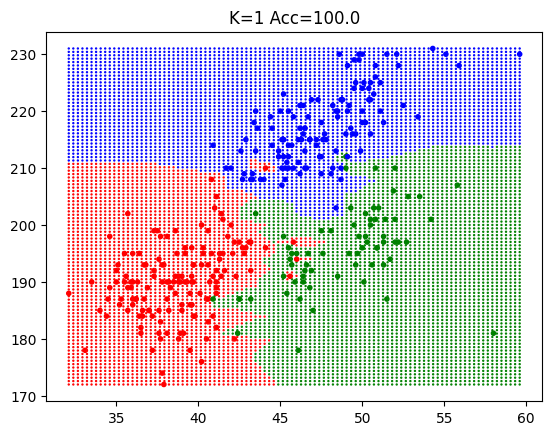

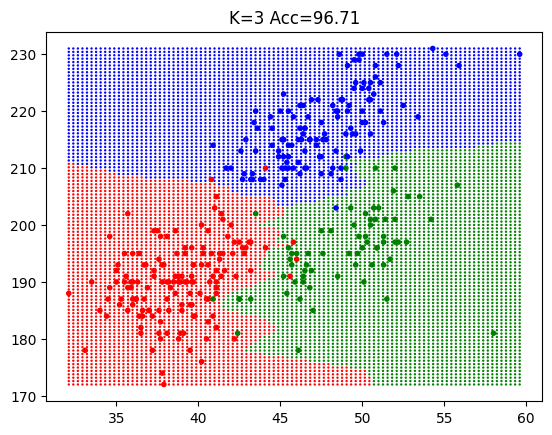

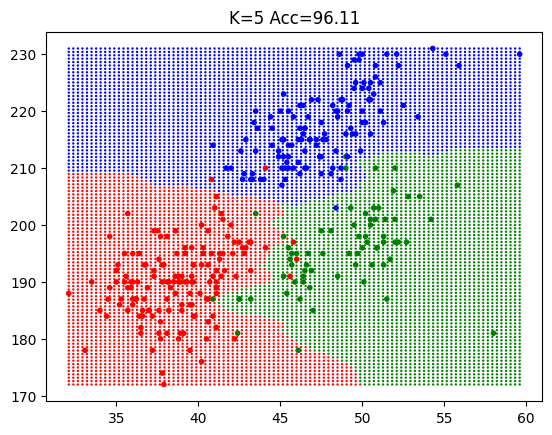

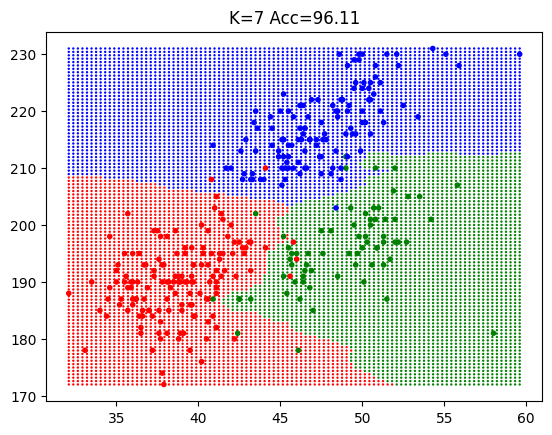

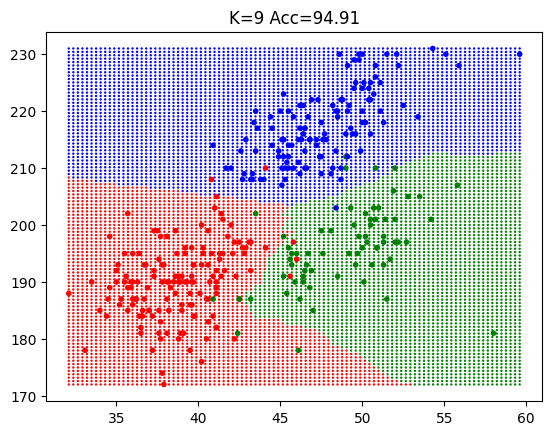

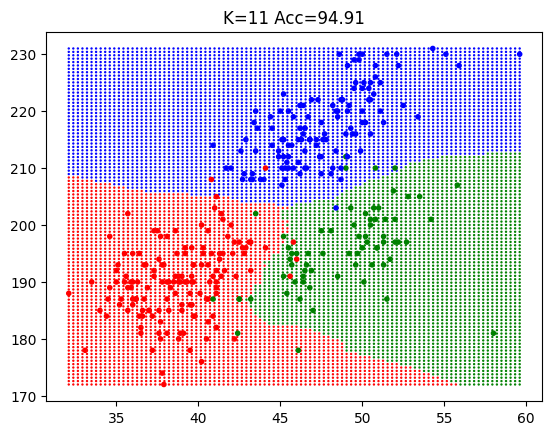

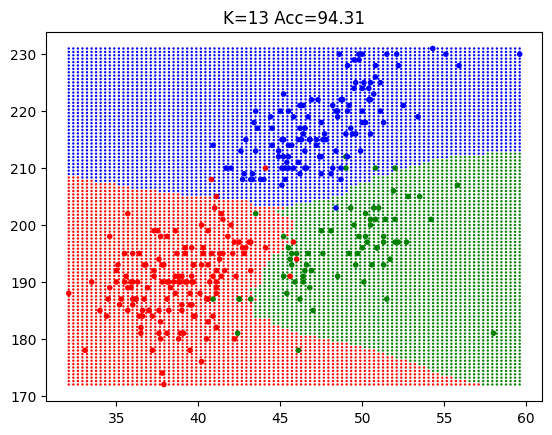

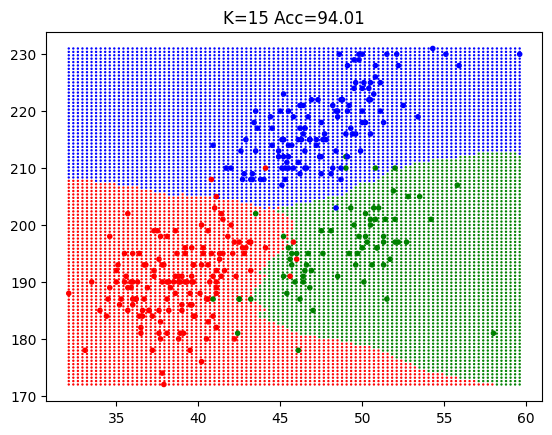

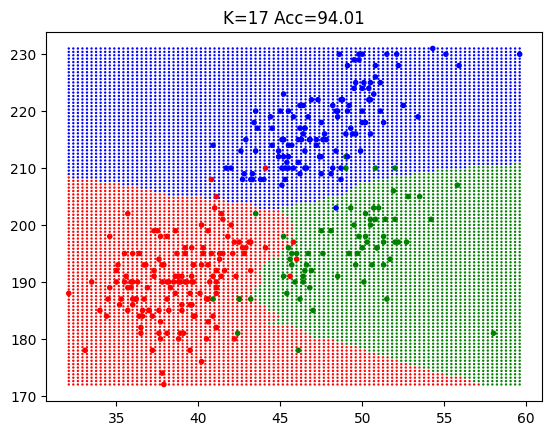

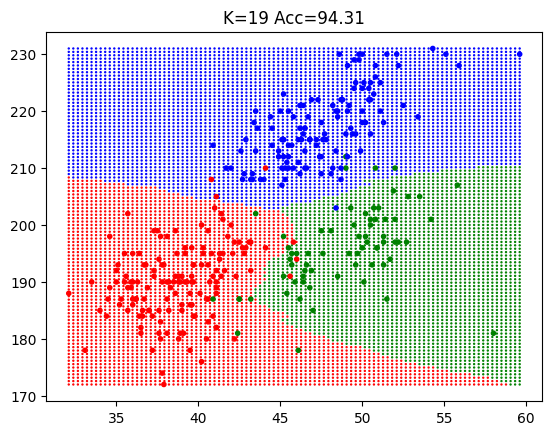

In [19]:
X = X_penguin[[X_penguin.columns[0], X_penguin.columns[2]]]
y = y_penguin.apply(encode_penguins)
for n in range(1,21,2):
    model = KNeighborsClassifier(n_neighbors=n, algorithm='kd_tree')
    model.fit(X, y)
    yhat = model.predict(X)
    accuracy = round(100*np.sum(yhat == y) / len(y),2)
    
    visualize_decision_boundary(X, y, model, f"K={n} Acc={accuracy}").show()